# Logistic Regression

In [1]:
# https://www.kaggle.com/hesh97/titanicdataset-traincsv
# get dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Analysis & Visualization: 

In [4]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\titanic_data.csv')

In [5]:
df.shape

(891, 12)

In [6]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\titanic_data.csv')

In [7]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
# check for any other unusual values
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Number of female who survived: 1    233
0     81
Name: Survived, dtype: int64
Number of male who survived: 0    468
1    109
Name: Survived, dtype: int64


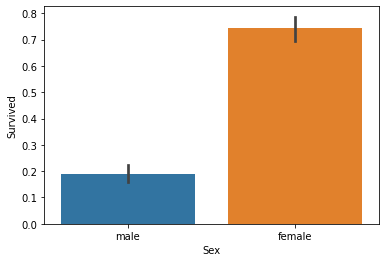

In [11]:
#draw a plot of survival by sex
sns.barplot(x = 'Sex', y = "Survived", data = df)

#print number of females vs males that survived
print("Number of female who survived:",df["Survived"][df
     ["Sex"] == 'female'].value_counts())

print("Number of male who survived:",df["Survived"][df
      ["Sex"] == 'male'].value_counts())

Percentage of females who Survived: 74.20382165605095
Percentage of males who Survived: 18.890814558058924


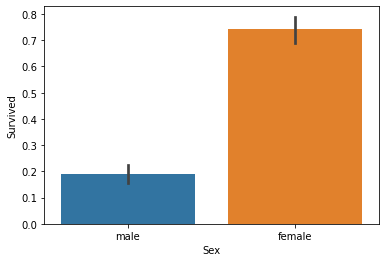

In [12]:
# draw a bar plot survival by sex
sns.barplot(x = "Sex", y = "Survived", data = df)

#print Percentage of females vs males that survived
print("Percentage of females who Survived:",df["Survived"][df
       ["Sex"] == 'female'].value_counts(normalize=True)[1]*100)
print("Percentage of males who Survived:",df["Survived"][df
        ["Sex"] == 'male'].value_counts(normalize=True)[1]*100)

Percentage of Pclass = 1 who survived:  62.96296296296296
Percentage of Pclass = 2 who Survived : 47.28260869565217
Percentage of Pclass = 3 who survived:  24.236252545824847


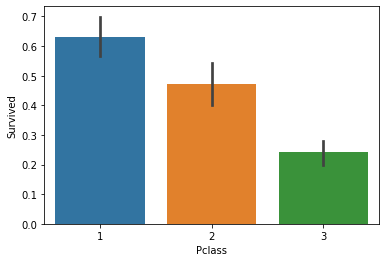

In [13]:
# Draw a bar plot of survival vy Pclass
sns.barplot(x = "Pclass", y = "Survived", data = df)

#print percentage of people survived by pclass
print("Percentage of Pclass = 1 who survived: ",df["Survived"][df
      ["Pclass"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of Pclass = 2 who Survived :",df["Survived"][df
       ["Pclass"] == 2].value_counts(normalize=True)[1]*100)

print("Percentage of Pclass = 3 who survived: ",df["Survived"][df
        ["Pclass"] == 3].value_counts(normalize=True)[1]*100)

Percentage of SibSp = 0 who survived:  34.53947368421053
Percentage of SibSp = 1 who survived:  53.588516746411486
Percentage of SibSp = 2 who survived:  46.42857142857143
Percentage of SibSp = 3 who survived:  25.0
Percentage of SibSp = 4 who survived:  16.666666666666664


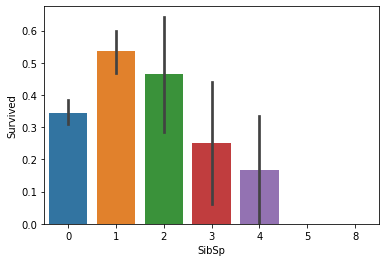

In [14]:
# Draw a bar plot for SibSp vs. survival
sns.barplot(x = "SibSp", y = "Survived", data = df)

print("Percentage of SibSp = 0 who survived: ",df["Survived"][df
      ["SibSp"] == 0].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 1 who survived: ",df["Survived"][df
      ["SibSp"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 2 who survived: ",df["Survived"][df
      ["SibSp"] == 2].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 3 who survived: ",df["Survived"][df
      ["SibSp"] == 3].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 4 who survived: ",df["Survived"][df
      ["SibSp"] == 4].value_counts(normalize=True)[1]*100)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

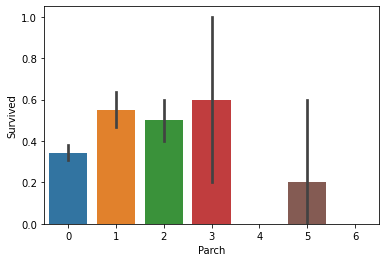

In [15]:
# Draw a bar chart for Parch vs. survival
sns.barplot(x = "Parch", y = "Survived", data = df)

<AxesSubplot:ylabel='Age'>

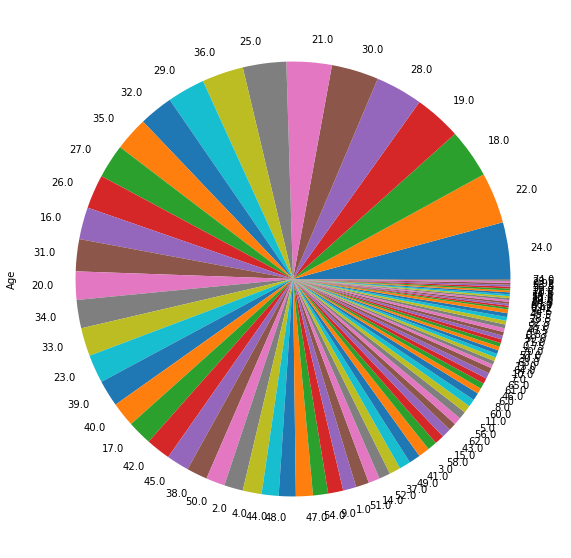

In [16]:
plt.figure(figsize=(10,10))
df.Age.value_counts().plot(kind = 'pie')

Percentage of CabinBool = 1 who survuved:  66.66666666666666
Percentage of CabinBool = 0 who survived:  29.985443959243085


<AxesSubplot:xlabel='CabinBool', ylabel='Survived'>

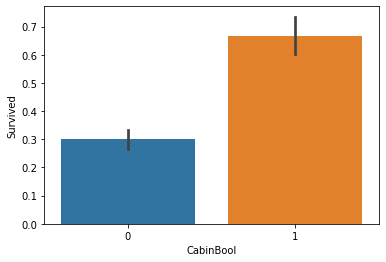

In [17]:
df['CabinBool'] = (df["Cabin"].notnull().astype('int'))

#calculate percentage of CabinBool vs Survived
print("Percentage of CabinBool = 1 who survuved: ",df["Survived"][df
        ["CabinBool"] == 1].value_counts(normalize=1)[1]*100)

print("Percentage of CabinBool = 0 who survived: ",df["Survived"][df
        ["CabinBool"] == 0].value_counts(normalize=1)[1]*100)

# Draw a bar plot of Cabinbool vs. survival
sns.barplot(x = "CabinBool",y = "Survived", data = df)

## Logistic regression Model: 

In [18]:
data.shape

(891, 12)

In [19]:
data = data.dropna()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [21]:
data = data.drop(['Embarked','Name','Cabin','Ticket'], axis = 1)

In [22]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1),
                                                   data['Survived'], test_size=0.20,
                                                   random_state=8)

In [24]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [25]:
predictions = logmodel.predict(x_test)
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
809,810,1,1,33.0,1,0,53.1000
137,138,1,0,37.0,1,0,53.1000
496,497,1,1,54.0,1,0,78.2667
659,660,1,0,58.0,0,2,113.2750
3,4,1,1,35.0,1,0,53.1000


In [26]:
accuracy = logmodel.score(x_test, y_test)
print(accuracy*100,'%')

81.08108108108108 %


In [27]:
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

## Classification Report: 

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.91      0.85        22

    accuracy                           0.81        37
   macro avg       0.82      0.79      0.80        37
weighted avg       0.81      0.81      0.81        37



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[10,  5],
       [ 2, 20]], dtype=int64)